In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(pre URL-HTML cross).csv")
data

,labels,dt_prediction_non,dt_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish
0,0,0.929648,0.070352,1.0,0.0,0.986338,0.013662
1,0,0.975591,0.024409,1.0,0.0,0.998826,0.001174
2,1,0.000000,1.000000,0.0,1.0,0.000908,0.999092
3,0,0.975591,0.024409,1.0,0.0,0.995848,0.004152
4,0,0.975591,0.024409,1.0,0.0,0.997278,0.002722
...,...,...,...,...,...,...,...
4647,0,0.975591,0.024409,1.0,0.0,0.999136,0.000864
4648,0,0.975591,0.024409,1.0,0.0,0.997809,0.002191
4649,1,0.006309,0.993691,0.0,1.0,0.002664,0.997336
4650,0,0.450000,0.550000,1.0,0.0,0.995104,0.004896


In [4]:
data.columns

Index(['labels', 'dt_prediction_non', 'dt_prediction_phish',
       'knn_prediction_non', 'knn_prediction_phish', 'XGB_prediction_non',
       'XGB_prediction_phish'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                4652 non-null   int64  
 1   dt_prediction_non     4652 non-null   float64
 2   dt_prediction_phish   4652 non-null   float64
 3   knn_prediction_non    4652 non-null   float64
 4   knn_prediction_phish  4652 non-null   float64
 5   XGB_prediction_non    4652 non-null   float64
 6   XGB_prediction_phish  4652 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 254.5 KB


In [6]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(4652, 6) (4652,)


In [7]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))


  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.5058 - accuracy: 0.8667 - val_loss: 0.2946 - val_accuracy: 0.9893
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9895 - val_loss: 0.0934 - val_accuracy: 0.9914
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9919 - val_loss: 0.0462 - val_accuracy: 0.9914
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9931 - val_loss: 0.0342 - val_accuracy: 0.9936
Epoch 5/100
131/131 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9933 - val_loss: 0.0309 - val_accuracy: 0.9936
Epoch 6/100
131/131 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9935 - val_loss: 0.0290 - val_accuracy: 0.9957
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.0282 - val_accuracy: 0.9957

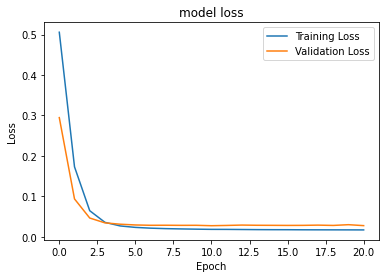

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       260
           1       1.00      0.99      0.99       206

    accuracy                           0.99       466
   macro avg       0.99      0.99      0.99       466
weighted avg       0.99      0.99      0.99       466

Accuracy: 0.9935622317596566
[[260   0]
 [  3 203]]
Precision: 1.0000
Recall: 0.9854
F1 Score: 0.9927
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1778 - accuracy: 0.9654 - val_loss: 0.0352 - val_accuracy: 0.9936
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9955 - val_loss: 0.0256 - val_accuracy: 0.9936
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9959 - val_loss: 0.0239 - val_accuracy: 0.9936
Epoch 4/100
131/131 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9964 - val_loss: 0.0259 

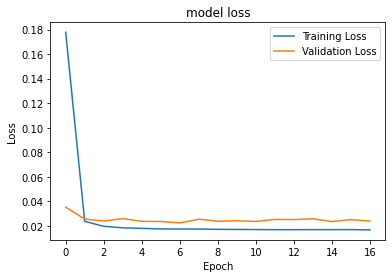

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       1.00      0.99      0.99       216

    accuracy                           0.99       466
   macro avg       0.99      0.99      0.99       466
weighted avg       0.99      0.99      0.99       466

Accuracy: 0.9935622317596566
[[250   0]
 [  3 213]]
Precision: 1.0000
Recall: 0.9861
F1 Score: 0.9930
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1302 - accuracy: 0.9565 - val_loss: 0.0281 - val_accuracy: 0.9935
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9926 - val_loss: 0.0210 - val_accuracy: 0.9935
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9943 - val_loss: 0.0186 - val_accuracy: 0.9935
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9950 - val_loss: 0.0172 

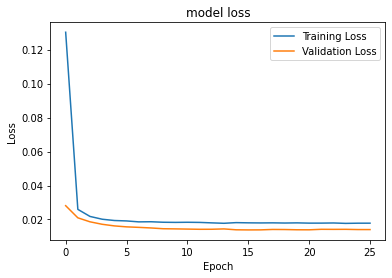

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       201

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9956989247311828
[[263   1]
 [  1 200]]
Precision: 0.9950
Recall: 0.9950
F1 Score: 0.9950
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1784 - accuracy: 0.9661 - val_loss: 0.0495 - val_accuracy: 0.9849
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9945 - val_loss: 0.0390 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9945 - val_loss: 0.0377 - val_accuracy: 0.9871
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9945 - val_loss: 0.0376 

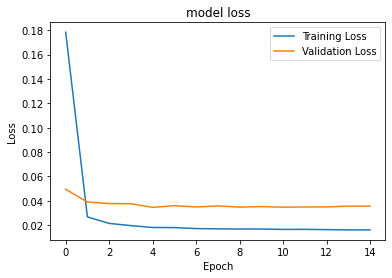

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       267
           1       0.98      0.99      0.99       198

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9913978494623656
[[264   3]
 [  1 197]]
Precision: 0.9850
Recall: 0.9949
F1 Score: 0.9899
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1679 - accuracy: 0.9544 - val_loss: 0.0226 - val_accuracy: 0.9957
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9926 - val_loss: 0.0113 - val_accuracy: 0.9957
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9938 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9952 - val_loss: 0.0067 

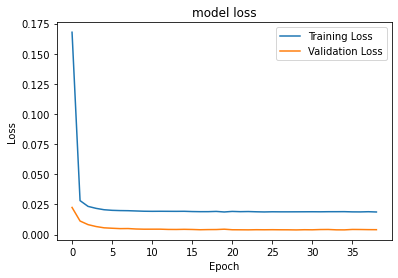

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       274
           1       1.00      1.00      1.00       191

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 1.0
[[274   0]
 [  0 191]]
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.9663 - val_loss: 0.0232 - val_accuracy: 0.9957
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9933 - val_loss: 0.0143 - val_accuracy: 0.9935
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9952 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9955 - val_loss: 0.0078 - val_accuracy:

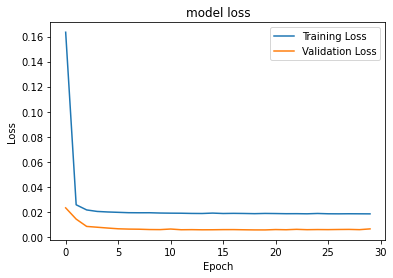

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       200

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 1.0
[[265   0]
 [  0 200]]
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1960 - accuracy: 0.9694 - val_loss: 0.0367 - val_accuracy: 0.9957
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9928 - val_loss: 0.0205 - val_accuracy: 0.9978
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.0173 - val_accuracy: 0.9978
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9943 - val_loss: 0.0167 - val_accuracy:

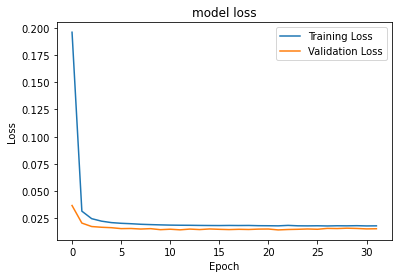

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      1.00      1.00       203

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9978494623655914
[[261   1]
 [  0 203]]
Precision: 0.9951
Recall: 1.0000
F1 Score: 0.9975
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3109 - accuracy: 0.9026 - val_loss: 0.1360 - val_accuracy: 0.9871
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9940 - val_loss: 0.0430 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9943 - val_loss: 0.0350 - val_accuracy: 0.9914
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9947 - val_loss: 0.0312 

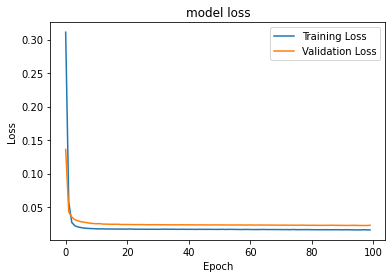

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       224

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9956989247311828
[[240   1]
 [  1 223]]
Precision: 0.9955
Recall: 0.9955
F1 Score: 0.9955
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1219 - accuracy: 0.9924 - val_loss: 0.0267 - val_accuracy: 0.9957
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9938 - val_loss: 0.0226 - val_accuracy: 0.9957
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9952 - val_loss: 0.0227 - val_accuracy: 0.9957
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9955 - val_loss: 0.0229 

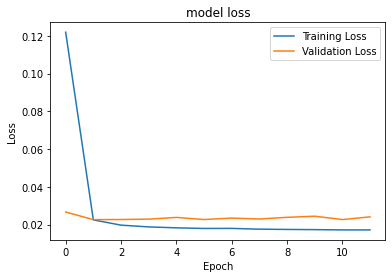

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       258
           1       0.99      1.00      1.00       207

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9956989247311828
[[256   2]
 [  0 207]]
Precision: 0.9904
Recall: 1.0000
F1 Score: 0.9952
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1478 - accuracy: 0.9943 - val_loss: 0.0201 - val_accuracy: 0.9957
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9952 - val_loss: 0.0124 - val_accuracy: 0.9978
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9959 - val_loss: 0.0110 - val_accuracy: 0.9978
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9959 - val_loss: 0.0104 

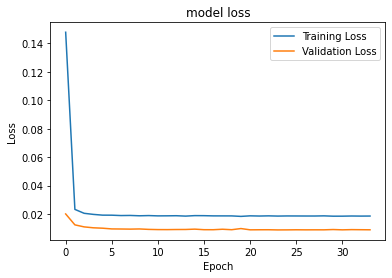

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       0.99      1.00      1.00       194

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465

Accuracy: 0.9978494623655914
[[270   1]
 [  0 194]]
Precision: 0.9949
Recall: 1.0000
F1 Score: 0.9974
Average Validation Accuracy: 0.996131801190641


In [8]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

